##Economic Data Analysis with FRED and pandas

In [3]:
!pip install fredapi > /dev/null

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.options.display.max_columns=500
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_key = 'MY_API_KEY'

#1. Create the Fred Object

In [7]:
fred = Fred(api_key=fred_key)

#2. Search for economic data

In [12]:
sp_search = fred.search('S&P', order_by='popularity')

In [14]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-08-22,2024-08-22,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-08-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-08-22 08:29:13-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-08-22,2024-08-22,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-07-30 08:11:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-08-22,2024-08-22,S&P 500,2014-07-31,2024-08-22,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-08-22 19:01:01-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-08-22,2024-08-22,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-08-22,2024-08-22,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-08-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-08-22 08:29:16-05:00,82,This data represents the effective yield of th...


#3. Pull raw data and plot


In [16]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

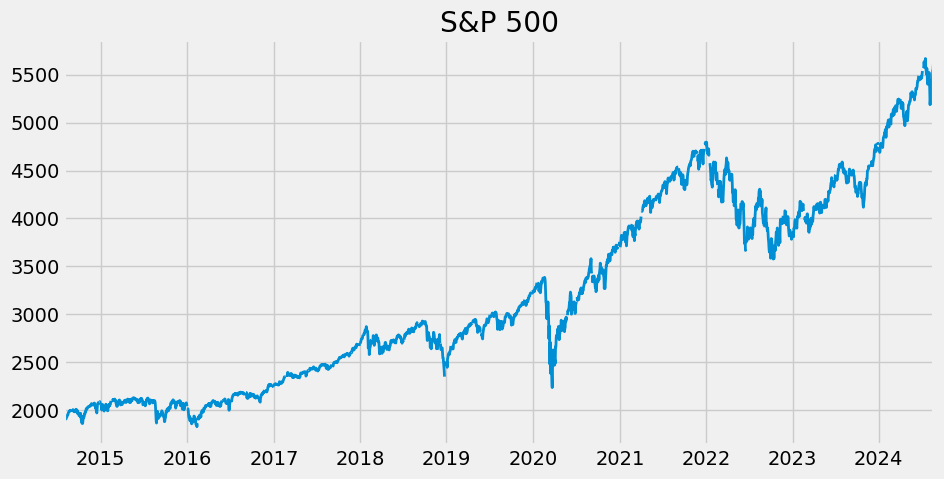

In [20]:
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)

#Pull and Join Multiple Data Series

In [117]:
unemp_res = fred.search('unemployment')

In [151]:
unemp_df = fred. search('unemployment rate state', filter=('frequency', 'Monthly' ))
unemp_df = unemp_df. query ('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[
    (unemp_df['title'].str.contains('Unemployment Rate in')) &
    (unemp_df['id'].str.len() == 4)]
unemp_df.shape

(52, 15)

In [120]:
all_results = []

for myid in unemp_df.index:
  results = fred.get_series(myid) #pull each dataset from the above df
  results = results.to_frame(name=myid) #make them a df
  all_results.append(results) #append to the list all_results


In [136]:
all_results[0] # each data frame is added to all_results
# list now we need to join them all together

,CAUR
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2024-03-01,5.3
2024-04-01,5.3
2024-05-01,5.2
2024-06-01,5.2


In [137]:
unemp_states = pd.concat(all_results, axis=1)
# unemp_states = unemp_df[unemp_df.columns[unemp_df.columns.str.match(r'^.{1,4}$')]]
# unemp_states = unemp_df.dropna()
unemp_states


,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,NDUR,MTUR,DCUR,MSUR,MEUR,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,3.5,4.8,4.8,3.1,3.7,3.8,3.0,2.9,4.5,3.1,3.8,2.7,3.2,4.8,2.5,4.2,4.3,5.1,3.5,3.5,3.3,4.6,2.9,2.8,5.8,3.5,4.4,3.1,2.0,3.3,5.2,3.0,3.3,2.5,4.5,3.3,2.6,4.1,2.7,2.8,3.9,2.2,2.1
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.2,3.8,2.7,3.1,4.8,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,5.8,3.6,4.3,3.1,2.0,3.1,5.2,2.8,3.1,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,3.6,4.9,4.6,3.2,3.8,3.4,2.9,2.7,4.6,3.4,3.8,2.8,3.0,4.9,2.7,4.2,4.2,5.1,3.4,3.5,3.5,4.5,2.8,2.9,5.8,3.7,4.1,3.0,2.0,3.1,5.3,2.8,3.0,2.5,4.3,3.3,2.5,4.3,2.9,2.9,3.9,2.1,2.0
2024-06-01,5.2,4.0,4.2,3.3,3.4,4.4,4.1,2.9,3.2,3.6,5.0,4.6,3.3,3.8,3.3,2.9,2.7,4.6,3.6,3.9,2.9,3.0,4.8,2.8,4.1,4.1,5.2,3.3,3.4,3.7,4.5,2.8,3.0,5.8,3.8,4.0,2.9,2.1,3.1,5.4,2.8,2.8,2.6,3.9,3.4,2.5,4.3,3.0,2.9,4.0,2.1,2.0


In [138]:
#Plot States Unemployment Rate
px.line(unemp_states)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



#Pull May 2020 Unemployment Rate Per State

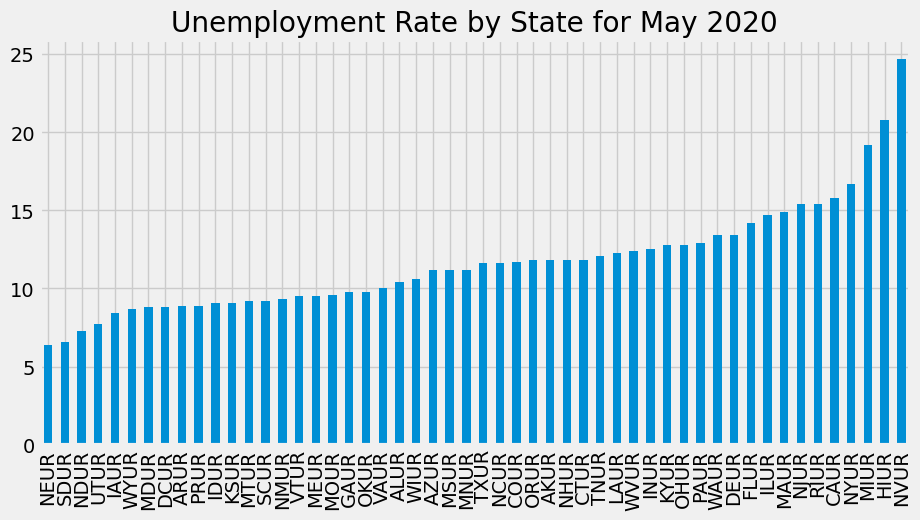

In [139]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
.sort_values('2020-05-01'). \
plot(kind='bar', figsize=(10,5), title='Unemployment Rate by State for May 2020')
ax.legend().remove()
plt.show()

In [140]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]


In [144]:
px.line(unemp_states)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



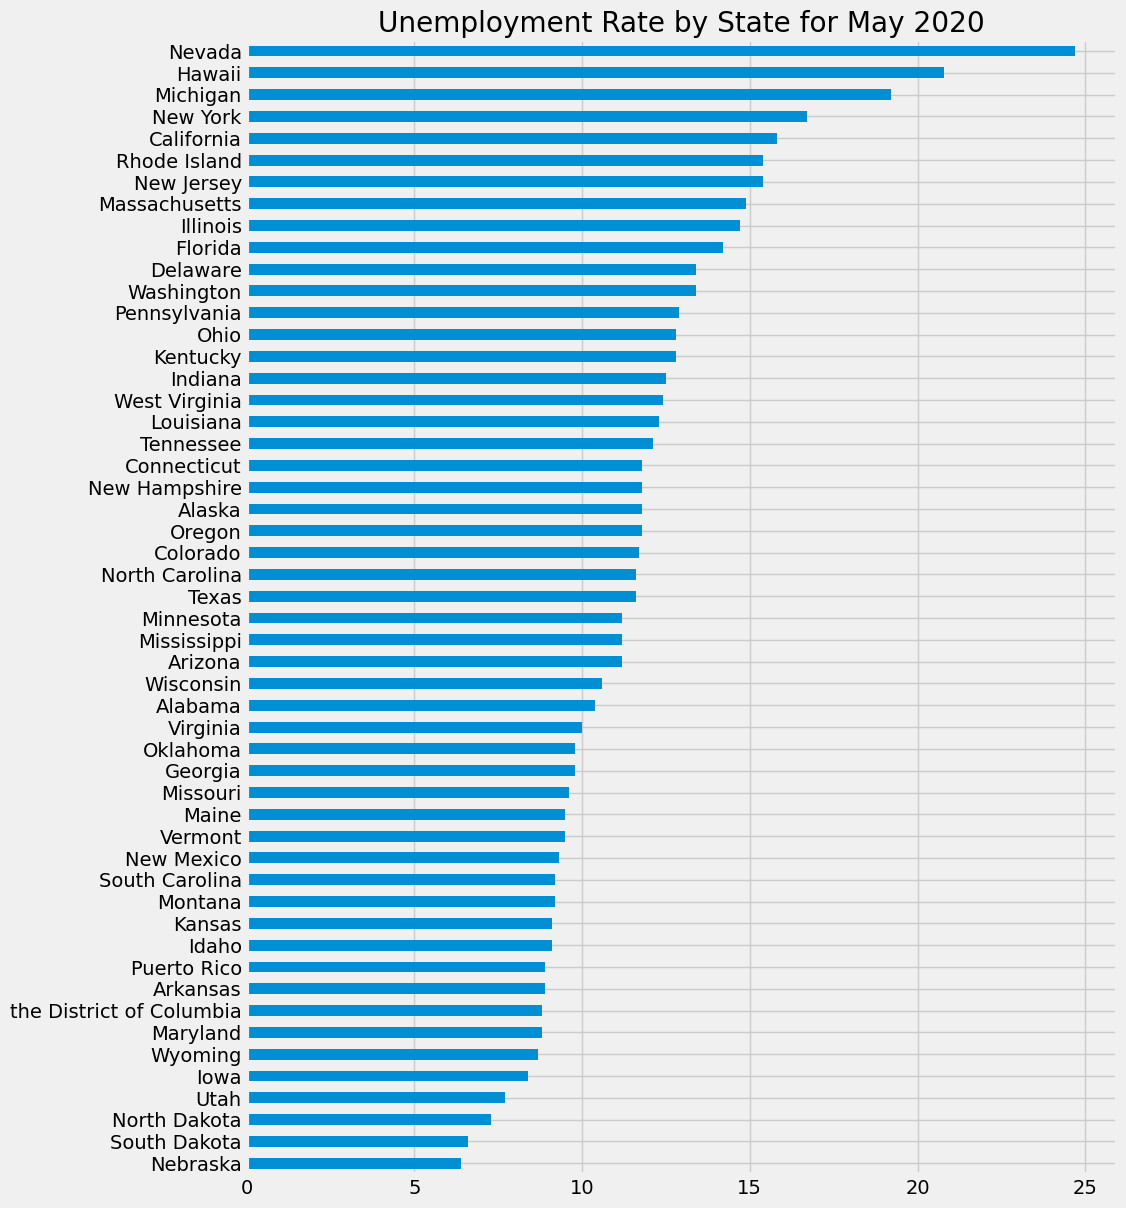

In [148]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
.sort_values('2020-05-01'). \
plot(kind='barh', \
     figsize=(10,14), \
     title='Unemployment Rate by State for May 2020')
ax.legend().remove()
plt.show()

# Pull Participation Rate

In [159]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly' ))
part_df = part_df.query ('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[(part_df['title'].str.contains('Labor Force Participation Rate for '))]

part_df.shape

(51, 15)

In [165]:
part_id_to_state = part_df['title'].str.strip('Labor Force Participation Rate for ').to_dict()

all_results = []

for myid in part_df.index:
  results = fred.get_series(myid) #pull each dataset from the above df
  results = results.to_frame(name=myid) #make them a df
  all_results.append(results) #append to the list all_results

part_states = pd.concat(all_results, axis=1)


In [167]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]


In [169]:
part_states.shape

(583, 51)

#Plot Unemployment vs Participation

In [179]:
unemp_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah',
       'Puerto Rico', 'Indiana', 'Louisiana', 'Hawaii', 'North Dakota',
       'Montana', 'the District of Columbia', 'Mississippi', 'Maine',
       'Nebraska', 'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island',
       'Kansas', 'Wyoming', 'Delaware', 'Vermont', 'South Dakota'],
      dtype='object')

In [180]:
part_states.columns

Index(['Cal', 'Alabam', 'New York', 'Michig', 'Mississ', 'Texas', 'lorid',
       'Kentucky', 'Oh', 'Wiscons', 'sylv', 'Massachusetts', 'Minnes',
       'Maryland', 'West Virg', 'Tenness', 'M', 'Illinois', 'North Carol',
       'Georg', 'uis', 'South Carol', 'Colorad', 'Utah', 'Virg', 'Ind',
       'Missou', 'New Jersey', 'Iow', 'Alask', 'Washing', 'Ariz', 'New Mex',
       'Idah', 'Arkansas', 'Oklahom', 'Nebrask', 'Haw', 'Nevad', 'M', 'Oreg',
       'New Hampsh', 'Verm', 'Connecticu', 'North Dak', 'South Dak', 'Kansas',
       'hode Island', 'District Of Colum', 'Delaw', 'Wyoming'],
      dtype='object')

In [185]:
unemp_states_list = unemp_states.columns.to_list()
part_states_list = part_states.columns.to_list()

unemp_states_list = pd.Series(unemp_states_list)
part_states_list = pd.Series(part_states_list)



In [181]:
!pip install fuzzywuzzy[speedup] > /dev/null

In [186]:
import pandas as pd
from fuzzywuzzy import process

# Function to match incomplete names to full names
def match_state_name(name, choices, scorer, cutoff=80):
    match = process.extractOne(name, choices, scorer=scorer)
    return match[0] if match[1] >= cutoff else None

# Apply the function to your incomplete names
part_states_complete = part_states_list.apply(match_state_name, args=(unemp_states_list, process.fuzz.token_sort_ratio))

# Display the completed names
print(part_states_complete)

0                         None
1                      Alabama
2                     New York
3                     Michigan
4                         None
5                        Texas
6                      Florida
7                     Kentucky
8                         None
9                    Wisconsin
10                        None
11               Massachusetts
12                   Minnesota
13                    Maryland
14               West Virginia
15                   Tennessee
16                        None
17                    Illinois
18              North Carolina
19                     Georgia
20                        None
21              South Carolina
22                    Colorado
23                        Utah
24                        None
25                        None
26                    Missouri
27                  New Jersey
28                        Iowa
29                      Alaska
30                  Washington
31                        None
32      

Text(0.5, 1.0, 'New York')

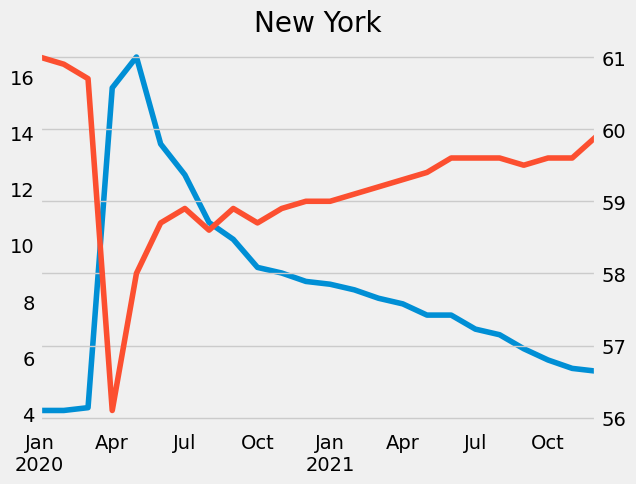

In [187]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index >= 2020 and index < 2022')['New York'] \
.plot(ax=ax, label='Unemployment')
part_states.query('index >= 2020 and index < 2022')['New York'] \
.plot(ax=ax2, label='Participation', color=color_pal[1])
ax.grid(False)
ax.set_title('New York')